In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
import os
import sys
frame=pd.read_csv("C://Users/SAIRAM YERRAMSETTI/Documents/data sets/Churn_MV.csv")

In [8]:
frame.dtypes

Account Length      float64
VMail Message       float64
Day Mins            float64
Eve Mins            float64
Night Mins          float64
Intl Mins           float64
CustServ Calls      float64
Churn               float64
Intl Plan           float64
VMail Plan          float64
Day Calls           float64
Day Charge          float64
Daily Charges MV    float64
Eve Calls           float64
Eve Charge          float64
Night Calls         float64
Night Charge        float64
Intl Calls          float64
Intl Charge         float64
State                object
Area Code           float64
Phone                object
dtype: object

In [7]:
frame.info

<bound method DataFrame.info of       Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  \
0                NaN            NaN       NaN       NaN         NaN   
1              128.0           25.0     265.1     197.4       244.7   
2                NaN            NaN       NaN       NaN         NaN   
3              107.0           26.0     161.6     195.5       254.4   
4                NaN            NaN       NaN       NaN         NaN   
5              137.0            0.0     243.4     121.2       162.6   
6                NaN            NaN       NaN       NaN         NaN   
7               84.0            0.0     299.4      61.9       196.9   
8                NaN            NaN       NaN       NaN         NaN   
9               75.0            0.0     166.7     148.3       186.9   
10               NaN            NaN       NaN       NaN         NaN   
11             118.0            0.0     223.4     220.6       203.9   
12               NaN            NaN       NaN

In [9]:
##why it is done here??

frame['Churn']=frame['Churn'].astype('object')
frame['Intl Plan']=frame['Intl Plan'].astype('object')
frame['VMail Plan']=frame['VMail Plan'].astype('object')
frame['Area Code']=frame['Area Code'].astype('object')


In [12]:
frame.isnull()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
frame.isna().sum()

Account Length      3333
VMail Message       3333
Day Mins            3333
Eve Mins            3333
Night Mins          3333
Intl Mins           3333
CustServ Calls      3333
Churn               3333
Intl Plan           3333
VMail Plan          3333
Day Calls           3333
Day Charge          3333
Daily Charges MV    3383
Eve Calls           3333
Eve Charge          3333
Night Calls         3333
Night Charge        3333
Intl Calls          3333
Intl Charge         3333
State               3333
Area Code           3333
Phone               3333
dtype: int64

In [20]:
#making new dataframe with dropped NA values

nf=frame.dropna(axis=0,how='all')

In [21]:
nf

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
1,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0,0,1,...,45.07,99.0,16.78,91.0,11.01,3.0,2.70,KS,415,382-4657
3,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0,0,1,...,27.47,103.0,16.62,103.0,11.45,3.0,3.70,OH,415,371-7191
5,137.0,0.0,243.4,121.2,162.6,12.2,0.0,0,0,0,...,41.38,110.0,10.30,104.0,7.32,5.0,3.29,NJ,415,358-1921
7,84.0,0.0,299.4,61.9,196.9,6.6,2.0,0,1,0,...,50.90,88.0,5.26,89.0,8.86,7.0,1.78,OH,408,375-9999
9,75.0,0.0,166.7,148.3,186.9,10.1,3.0,0,1,0,...,28.34,122.0,12.61,121.0,8.41,3.0,2.73,OK,415,330-6626
11,118.0,0.0,223.4,220.6,203.9,6.3,0.0,0,1,0,...,37.98,101.0,18.75,118.0,9.18,6.0,1.70,AL,510,391-8027
13,121.0,24.0,218.2,348.5,212.6,7.5,3.0,0,0,1,...,NaN,108.0,29.62,118.0,9.57,7.0,2.03,MA,510,355-9993
15,147.0,0.0,157.0,103.1,211.8,7.1,0.0,0,1,0,...,26.69,94.0,8.76,96.0,9.53,6.0,1.92,MO,415,329-9001
17,117.0,0.0,184.5,351.6,215.8,8.7,1.0,0,0,0,...,31.37,80.0,29.89,90.0,9.71,4.0,2.35,LA,408,335-4719
19,141.0,37.0,258.6,222.0,326.4,11.2,0.0,0,1,1,...,43.96,111.0,18.87,97.0,14.69,5.0,3.02,WV,415,330-8173


In [22]:
nf.isna().sum()

Account Length       0
VMail Message        0
Day Mins             0
Eve Mins             0
Night Mins           0
Intl Mins            0
CustServ Calls       0
Churn                0
Intl Plan            0
VMail Plan           0
Day Calls            0
Day Charge           0
Daily Charges MV    50
Eve Calls            0
Eve Charge           0
Night Calls          0
Night Charge         0
Intl Calls           0
Intl Charge          0
State                0
Area Code            0
Phone                0
dtype: int64

In [25]:
nf['Daily Charges MV'].mean()

30.533475479744165

In [26]:
nf['Daily Charges MV'].median()

30.5

In [31]:
nf['Daily Charges MV_mean']= nf['Daily Charges MV']
nf['Daily Charges MV_mean']=nf['Daily Charges MV_mean'].fillna(nf['Daily Charges MV'].mean())

C:\Users\SAIRAM YERRAMSETTI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SAIRAM YERRAMSETTI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
nf['Daily Charges MV_mean'].isnull().sum()

0

In [36]:
nf['Daily Charges MV_mean']

1       45.070000
3       27.470000
5       41.380000
7       50.900000
9       28.340000
11      37.980000
13      30.533475
15      26.690000
17      31.370000
19      43.960000
21      21.950000
23      30.533475
25      21.900000
27      26.620000
29      20.520000
31      30.533475
33      33.390000
35      32.420000
37      32.250000
39      38.150000
41      26.370000
43      10.610000
45      31.110000
47      18.770000
49      13.790000
51      21.130000
53      36.210000
55      22.830000
57      32.300000
59      20.280000
          ...    
6607    23.310000
6609    31.640000
6611    38.100000
6613    14.210000
6615    34.660000
6617    35.920000
6619    37.300000
6621    32.370000
6623    25.110000
6625    39.080000
6627    17.480000
6629    30.380000
6631    25.250000
6633    27.900000
6635    33.520000
6637    21.230000
6639    19.620000
6641    23.800000
6643    32.960000
6645    54.590000
6647    20.130000
6649    28.870000
6651    32.880000
6653    18.120000
6655    22

In [34]:
nf['Daily Charges MV_median']= nf['Daily Charges MV']
nf['Daily Charges MV_median']=nf['Daily Charges MV_median'].fillna(nf['Daily Charges MV'].median())

C:\Users\SAIRAM YERRAMSETTI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SAIRAM YERRAMSETTI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
nf['Daily Charges MV_median'].isnull().sum()

0

In [38]:
nf['Daily Charges MV_median']

1       45.07
3       27.47
5       41.38
7       50.90
9       28.34
11      37.98
13      30.50
15      26.69
17      31.37
19      43.96
21      21.95
23      30.50
25      21.90
27      26.62
29      20.52
31      30.50
33      33.39
35      32.42
37      32.25
39      38.15
41      26.37
43      10.61
45      31.11
47      18.77
49      13.79
51      21.13
53      36.21
55      22.83
57      32.30
59      20.28
        ...  
6607    23.31
6609    31.64
6611    38.10
6613    14.21
6615    34.66
6617    35.92
6619    37.30
6621    32.37
6623    25.11
6625    39.08
6627    17.48
6629    30.38
6631    25.25
6633    27.90
6635    33.52
6637    21.23
6639    19.62
6641    23.80
6643    32.96
6645    54.59
6647    20.13
6649    28.87
6651    32.88
6653    18.12
6655    22.90
6657    26.55
6659    39.29
6661    30.74
6663    36.35
6665    39.85
Name: Daily Charges MV_median, Length: 3333, dtype: float64

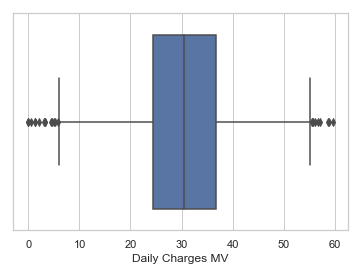

In [50]:
##checking for the outliers
import seaborn as sns
sns.set(style="whitegrid")
plot = sns.boxplot(nf["Daily Charges MV"])

In [60]:
##as we are having outliers we are checking for the rmse so we need errors. For that we do actauls-predicted

from sklearn.metrics import mean_squared_error
from math import sqrt

print('Root Mean squared Error for mean:',np.sqrt(metrics.mean_squared_error(nf['Day Charge'],nf['Daily Charges MV_mean'])))




Root Mean squared Error for mean: 1.5056502976472623


In [59]:
print('Root Mean Squared Error for median:',np.sqrt(mean_squared_error(nf['Day Charge'],nf['Daily Charges MV_median'])))

Root Mean Squared Error for median: 1.5062967645833603


##even though we are having outliers the error rate is low mean<median
##any value greater or lesser the value of q1 & q3 + IQR and bringing back to viscous value is said to be scaling and capping

In [65]:
from scipy.stats import iqr
iqr1=iqr(nf['Day Charge'],axis=0,rng=(25,75),interpolation='lower')
min1=nf['Day Charge'].quantile(.25)-1.5*iqr1
max1=nf['Day Charge'].quantile(.75)+1.5*iqr1

nf['Day Charge']=np.clip(nf['Day Charge'],min1,max1)

C:\Users\SAIRAM YERRAMSETTI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


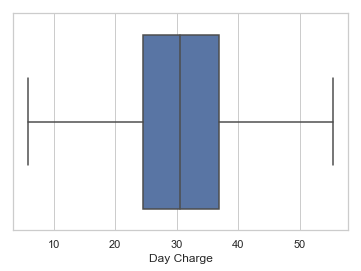

In [64]:
ax=sns.boxplot(nf['Day Charge'])

In [69]:
nf['Churn'].value_counts()

0.0    2850
1.0     483
Name: Churn, dtype: int64

In [ ]:
## class imbalance accuracy cant be taken as measure